# WAITER TIPS PREDICTION USING LINEAR REGRESSION


### Importing necesary libraries

In [74]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### Data Collection

In [76]:
df = pd.read_csv("waiter_dataset.csv")


### Data Exploration

In [77]:
print(df.head())

   total_bill    tip payment_method     day  timing   group  gender  \
0     1997.79  190.0           Cash  Sunday  Dinner  Couple    Male   
1     4763.43  470.3           Cash  Sunday   Lunch  Family    Male   
2     3713.57  370.7           Card  Sunday  Dinner  Family    Male   
3     3073.56  300.6           Card  Sunday   Lunch  Couple  Female   
4      948.89   94.9           Cash  Sunday   Lunch  Couple  Female   

         occasion   drunk  
0  Birthday Party   Drunk  
1  Birthday Party  Normal  
2     Anniversary   Drunk  
3  Birthday Party  Normal  
4  Birthday Party  Normal  


In [78]:
df.shape

(200, 9)

In [79]:
df.info

<bound method DataFrame.info of      total_bill    tip payment_method       day  timing    group  gender  \
0       1997.79  190.0           Cash    Sunday  Dinner   Couple    Male   
1       4763.43  470.3           Cash    Sunday   Lunch   Family    Male   
2       3713.57  370.7           Card    Sunday  Dinner   Family    Male   
3       3073.56  300.6           Card    Sunday   Lunch   Couple  Female   
4        948.89   94.9           Cash    Sunday   Lunch   Couple  Female   
..          ...    ...            ...       ...     ...      ...     ...   
195     1876.21  123.0           Card    Friday  Dinner   Family    Male   
196      384.59   43.0         Online  Saturday  Dinner  Friends    Male   
197      406.13   54.0           Cash    Friday   Lunch   Single    Male   
198      458.01   64.0           Card    Friday   Lunch   Family  Female   
199      343.40   31.0           Card    Friday   Lunch   Family  Female   

           occasion   drunk  
0    Birthday Party   Dru

In [80]:
df.columns

Index(['total_bill', 'tip', 'payment_method', 'day', 'timing', 'group',
       'gender', 'occasion', 'drunk'],
      dtype='object')

### Data Cleaning

#### 1.Handle missing value

In [81]:
df.dropna(inplace=True) 

#### 2. Handling categorical data

In [82]:
df = pd.get_dummies(df, columns=['payment_method'], drop_first=True)

In [83]:
from sklearn.preprocessing import OrdinalEncoder

days_order = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
ordinal_encoder = OrdinalEncoder(categories=days_order)
df['day'] = ordinal_encoder.fit_transform(df[['day']])


In [84]:
df = pd.get_dummies(df, columns=['timing'], drop_first=True)

In [85]:
df = pd.get_dummies(df, columns=['group'], drop_first=True)

In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [87]:
df = pd.get_dummies(df, columns=['occasion'], drop_first=True)

In [88]:
label_encoder = LabelEncoder()
df['drunk'] = label_encoder.fit_transform(df['drunk'])

#### Removing duplicates 

In [89]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())  # Prints the number of duplicate rows

0


#### Detect Outliers

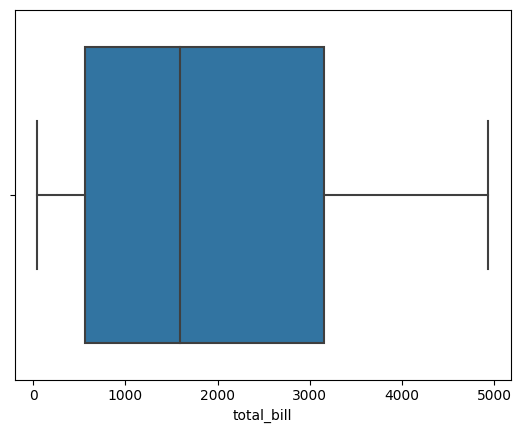

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['total_bill'])
plt.show()


No outlier detected

In [91]:
df.head()

,total_bill,tip,day,gender,drunk,payment_method_Cash,payment_method_Online,timing_Lunch,group_Family,group_Friends,group_Single,occasion_Birthday Party,occasion_Date,occasion_Festival
0,1997.79,190.0,6.0,1,0,True,False,False,False,False,False,True,False,False
1,4763.43,470.3,6.0,1,1,True,False,True,True,False,False,True,False,False
2,3713.57,370.7,6.0,1,0,False,False,False,True,False,False,False,False,False
3,3073.56,300.6,6.0,0,1,False,False,True,False,False,False,True,False,False
4,948.89,94.9,6.0,0,1,True,False,True,False,False,False,True,False,False


In [92]:
df.shape

(200, 14)

**So let's see tips distribution according to various aspects :**

In [93]:
fig = px.scatter(data_frame = df, x='total_bill', y='tip', color='payment_method_Cash',trendline="ols", 
             title='Distribution of Tips according to Payment Method', 
             labels={'tip': 'Total Tips (INR)', 'total_bill': 'Total bill paid by Customer'},
             hover_data=['tip'], 
             height=400)
fig.show()

In [94]:
fig = px.scatter(data_frame = df, x='total_bill', y='tip', color='payment_method_Online',trendline="ols", 
             title='Distribution of Tips according to Payment Method', 
             labels={'tip': 'Total Tips (INR)', 'total_bill': 'Total bill paid by Customer'},
             hover_data=['tip'], 
             height=400)
fig.show()

In [95]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='group_Family',trendline="ols",
             title='Distribution of Tips according to Type of People Group',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [96]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='group_Friends',trendline="ols",
             title='Distribution of Tips according to Type of People Group',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [97]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='gender',trendline="ols",
             title='Distribution of Tips wrt Gender',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [98]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='timing_Lunch', trendline="ols",
             title='Distribution of Tips by Timing',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [99]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='day', trendline="ols",
             title='Distribution of Tips according to Day',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [100]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='occasion_Birthday Party',trendline="ols",
             title='Distribution of Tips by Ocassion',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [101]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='occasion_Date',trendline="ols",
             title='Distribution of Tips by Ocassion',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [102]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='occasion_Festival',trendline="ols",
             title='Distribution of Tips by Ocassion',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by Customer'},
             height=400)
fig.show()

In [103]:
fig = px.scatter(data_frame= df, x='total_bill', y='tip', color='drunk',trendline="ols",
             title='Distribution of Tips by Drunk',
             labels={'tip': 'Tip (INR)', 'total_bill': 'Total bill paid by '},
             height=400)
fig.show()

**Tip given to waiter according to days**

In [104]:
figure = px.pie(df, 
             values='tip', 
             names='day')
figure.show()

##### It shows that, on Saturday and Sunday most tips are being given to the waiter

**Tip given to waiter according to Gender**

In [105]:
figure = px.pie(df, 
             values='tip', 
             names='gender',hole = 0.5)
figure.show()

##### It shows that most of the time male are giving tip to waiters

**Tip given to waiter according to people who smoked**

In [106]:
figure = px.pie(df, 
             values='tip', 
             names='drunk',hole = 0.5)
figure.show()

##### According to above drunk people are giving more tips to waiter

**Tips given to waiter according to timing when they came**

In [107]:
figure = px.pie(df, 
             values='tip', 
             names='timing_Lunch',hole = 0.5)
figure.show()

##### According to above data tips are more given at dinner time

**Tips given to waiter according to payment method**

In [108]:
figure = px.pie(df, 
             values='tip', 
             names='payment_method_Cash',hole = 0.5)
figure.show()

##### Most of the time cash payers are giving tips

**Tips given to waiter according to occassion**

In [71]:
figure = px.pie(df, 
             values='tip', 
             names='occasion',hole = 0.5)
figure.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'day', 'gender', 'drunk', 'payment_method_Cash', 'payment_method_Online', 'timing_Lunch', 'group_Family', 'group_Friends', 'group_Single', 'occasion_Birthday Party', 'occasion_Date', 'occasion_Festival'] but received: occasion

##### Tips are more given at birthday parties

**Tips given to waiter according to group of people**

In [109]:
figure = px.pie(df, 
             values='tip', 
             names='group_Friends',hole = 0.5)
figure.show()

In [110]:
figure = px.pie(df, 
             values='tip', 
             names='group_Family',hole = 0.5)
figure.show()

##### Couples are giving tip most of time

### Waiter tip prediction model

#### Split the data into features (X) and target (y)

In [112]:
df.columns

Index(['total_bill', 'tip', 'day', 'gender', 'drunk', 'payment_method_Cash',
       'payment_method_Online', 'timing_Lunch', 'group_Family',
       'group_Friends', 'group_Single', 'occasion_Birthday Party',
       'occasion_Date', 'occasion_Festival'],
      dtype='object')

In [115]:
x = np.array(df[["total_bill", "payment_method_Cash","payment_method_Online", "day", "timing_Lunch","group_Family","group_Friends","group_Single", "gender","occasion_Birthday Party","occasion_Date","occasion_Festival","drunk"]])
y = np.array(df["tip"])

#### Split the data into training and test sets

In [118]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.1,random_state=42)

#### Training of model

In [120]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
xtrain = imputer.fit_transform(xtrain)


In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

#### Features to input = ["total_bill", "payment_method_Cash","payment_method_Online", "day", "timing_Lunch","group_Family","group_Friends","group_Single", "gender","occasion_Birthday Party","occasion_Date","Occasion_Festival","drunk"]

In [122]:
features = np.array([[5000,1,0,1,0,0,0,0,1,1,0,0,1]])
model.predict(features)

array([463.7846134])

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [124]:
y_pred = model.predict(xtrain)

In [125]:
mae = mean_absolute_error(ytrain, y_pred)
mse = mean_squared_error(ytrain, y_pred)
r2 = r2_score(ytrain, y_pred)

In [126]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 19.40014455919766
Mean Squared Error (MSE): 762.1529376856779
R-squared (R²): 0.9592016614419517


Test01 something